In [3]:
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [37]:
vocab_size=1000
embedding_size=16
max_length=20
trunc_type='post'
padding_type='post'
oov_token='<OOV>'
training_size=20000

In [5]:
!gdown --id 1dRzdJS7-cZS4S5CuUc32MZYSLJGkkxnp

Downloading...
From: https://drive.google.com/uc?id=1dRzdJS7-cZS4S5CuUc32MZYSLJGkkxnp
To: /content/sarcasm.json
5.64MB [00:00, 49.7MB/s]


In [38]:
with open('/content/sarcasm.json','r') as f:
  datastore=json.load(f)

sentences=[]
labels=[]
for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [39]:
training_sentences=sentences[0:training_size]
testing_sentences=sentences[training_size:]
training_labels=labels[0:training_size]
testing_labels=labels[training_size:]

In [40]:
tokenizer=Tokenizer(vocab_size,oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index=tokenizer.word_index

In [41]:
training_seqs=tokenizer.texts_to_sequences(training_sentences)
training_pads=pad_sequences(training_seqs,maxlen=max_length,padding=padding_type,truncating=trunc_type)

In [42]:
testing_seqs=tokenizer.texts_to_sequences(testing_sentences)
testing_pads=pad_sequences(testing_seqs,maxlen=max_length,padding=padding_type,truncating=trunc_type)

In [43]:
import numpy as np
training_pads=np.array(training_pads)
training_labels=np.array(training_labels)
testing__pads=np.array(testing_pads)
testing_labels=np.array(testing_labels)

In [44]:
model=tf.keras.Sequential([
                           tf.keras.layers.Embedding(vocab_size,embedding_size,input_length=max_length),
                           tf.keras.layers.GlobalAveragePooling1D(),
                           tf.keras.layers.Dense(32,activation='relu'),
                           tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [45]:
history=model.fit(training_pads,training_labels,epochs=30,validation_data=(testing_pads,testing_labels),verbose=2)

Epoch 1/30
625/625 - 2s - loss: 0.5335 - accuracy: 0.7266 - val_loss: 0.4144 - val_accuracy: 0.8071
Epoch 2/30
625/625 - 1s - loss: 0.3793 - accuracy: 0.8257 - val_loss: 0.3980 - val_accuracy: 0.8137
Epoch 3/30
625/625 - 1s - loss: 0.3626 - accuracy: 0.8346 - val_loss: 0.4024 - val_accuracy: 0.8137
Epoch 4/30
625/625 - 1s - loss: 0.3566 - accuracy: 0.8382 - val_loss: 0.4082 - val_accuracy: 0.8114
Epoch 5/30
625/625 - 1s - loss: 0.3537 - accuracy: 0.8399 - val_loss: 0.4027 - val_accuracy: 0.8152
Epoch 6/30
625/625 - 1s - loss: 0.3509 - accuracy: 0.8404 - val_loss: 0.4087 - val_accuracy: 0.8116
Epoch 7/30
625/625 - 1s - loss: 0.3498 - accuracy: 0.8400 - val_loss: 0.4074 - val_accuracy: 0.8125
Epoch 8/30
625/625 - 1s - loss: 0.3470 - accuracy: 0.8421 - val_loss: 0.4075 - val_accuracy: 0.8097
Epoch 9/30
625/625 - 1s - loss: 0.3466 - accuracy: 0.8418 - val_loss: 0.4010 - val_accuracy: 0.8146
Epoch 10/30
625/625 - 1s - loss: 0.3435 - accuracy: 0.8433 - val_loss: 0.4073 - val_accuracy: 0.8067

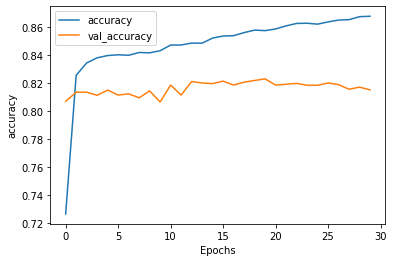

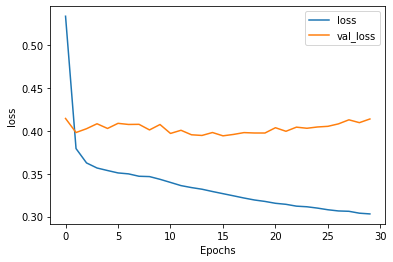

In [46]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")